In [1]:
import netCDF4
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import cmocean as cm
import matplotlib.colors as mcolors
from xgcm import Grid
%matplotlib inline
from mpl_toolkits import mplot3d
import gsw
import pandas as pd
import colormaps as cmaps

In [2]:
# !pip3 install colormaps

In [2]:
direc = "/data/gpfs/projects/punim1661/hori_conv/purturbation_exp/T_m_1/"
case = ""

In [3]:
# da_dyn = xr.open_dataset(direc + case + "output_Hori_Conv_v06.nc", decode_times=False)
da_dyn = xr.open_dataset(direc + case + "output_Hori_Conv_v01.nc", )

In [4]:
da_dyn# = da_dyn.load()#.time / (60*60)

<xarray.Dataset>
Dimensions:  (time: 20, y_afa: 513, x_faa: 513, x_caa: 512, y_aca: 512,
              z_aaf: 129, z_aac: 128)
Coordinates:
  * time     (time) timedelta64[ns] 04:00:00 04:05:00 ... 05:30:00 05:35:00
  * y_afa    (y_afa) float32 0.0 0.001953 0.003906 0.005859 ... 0.9961 0.998 1.0
  * x_faa    (x_faa) float32 0.0 0.001953 0.003906 0.005859 ... 0.9961 0.998 1.0
  * x_caa    (x_caa) float32 0.0009766 0.00293 0.004883 ... 0.9951 0.9971 0.999
  * y_aca    (y_aca) float32 0.0009766 0.00293 0.004883 ... 0.9951 0.9971 0.999
  * z_aaf    (z_aaf) float32 -0.1 -0.09922 -0.09844 ... -0.001563 -0.0007813 0.0
  * z_aac    (z_aac) float32 -0.09961 -0.09883 -0.09805 ... -0.001172 -0.0003906
Data variables:
    Δx_caa   (x_caa) float32 ...
    Δx_faa   (x_faa) float32 ...
    Δy_aca   (y_aca) float32 ...
    Δy_afa   (y_afa) float32 ...
    Δz_aac   (z_aac) float32 ...
    Δz_aaf   (z_aaf) float32 ...
    T        (time, z_aac, y_aca, x_caa) float32 ...
    u        (time, z_aac, y_aca, x_faa) float32 ...
    v        (time, z_aac, y_afa, x_caa) float32 ...
    w        (time, z_aaf, y_aca, x_caa) float32 ...
Attributes:
    Julia:                 This file was generated using CUDA GPU: NVIDIA A10...
    Oceananigans:          This file was generated using Oceananigans v0.100.7
    date:                  This file was generated on 2025-11-22T11:52:42.294...
    interval:              300.0
    output time interval:  Output was saved every 5 minutes.
    schedule:              TimeInterval

In [11]:
# da_dyn.isel(time=slice(-21,None)).to_netcdf(direc + case + "output_Hori_Conv_v06_.nc")

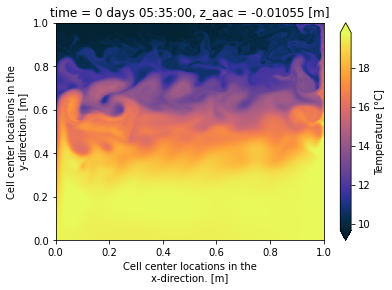

In [5]:
# da_dyn.T.isel(z_aac=-15, time=[-1]).mean('time').plot(robust=True, cmap=cm.cm.thermal)
da_dyn.T.isel(z_aac=-14, time=-1).plot(robust=True, cmap=cm.cm.thermal)

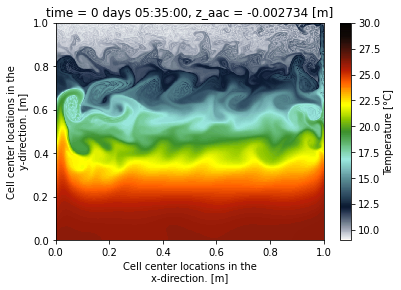

In [6]:
# da_dyn.T.isel(z_aac=-4, time=-1).plot(robust=True, cmap=cm.cm.thermal)
da_dyn.T.isel(z_aac=-4, time=-1).plot(vmin=9, vmax=30, cmap=cmaps.nice_gfdl)

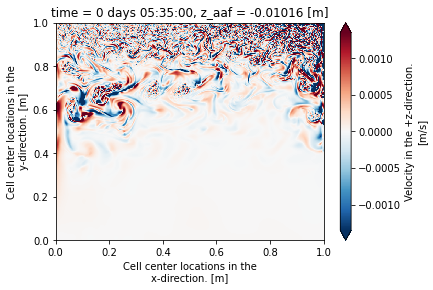

In [7]:
# da_dyn.w.isel(z_aaf=-27, time=-1).plot(robust=True)
da_dyn.w.isel(z_aaf=-14, time=-1).plot(robust=True)

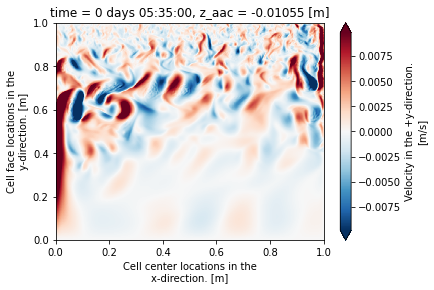

In [8]:
da_dyn.v.sel(y_afa=slice(0,1)).isel(z_aac=-14, time=-1).plot(robust=True)

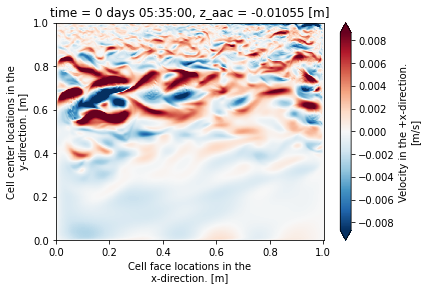

In [9]:
da_dyn.u.isel(z_aac=-14, time=-1).plot(robust=True)

In [17]:
EKE = 0.5*(
da_dyn.u.isel(z_aac=-4).interp(x_faa=da_dyn.x_caa)**2 +
da_dyn.v.isel(z_aac=-4).interp(y_afa=da_dyn.y_aca)**2 +
da_dyn.w.interp(z_aaf=da_dyn.z_aac).isel(z_aac=-4)**2
) / (g * α * ΔT / f0)**2

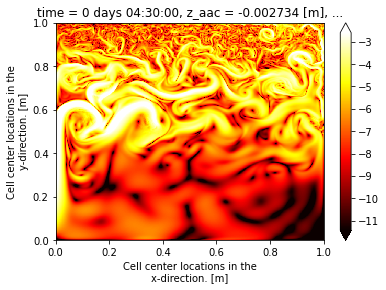

In [18]:
# np.log(EKE).plot(vmin=-7, vmax=-1, cmap='hot')
np.log(EKE.isel(time=-1)).plot(robust=True, cmap='hot')

In [19]:
T = (da_dyn.T - 10) / 20

In [20]:
w = da_dyn.w / (g * α * ΔT / f0)

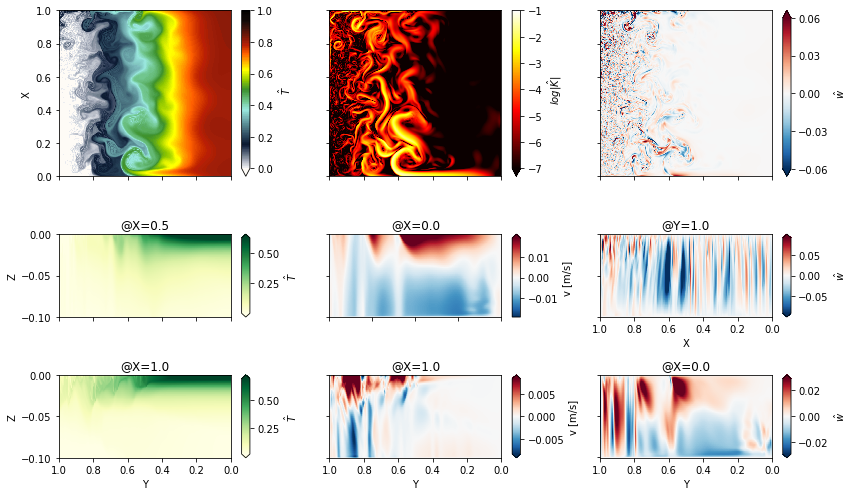

In [21]:
fig, ax = plt.subplots(3, 3, height_ratios=[2,1,1], figsize=[12,7])# width_ratios=[1,1,0.2])

T.isel(z_aac=-4, time=-1).plot(vmin=0, vmax=1, cmap=cmaps.nice_gfdl, ax=ax[0,0], x='y_aca', 
                                                      xincrease=False, cbar_kwargs={"label": r"$\hat{T}$"})

np.log(EKE.isel(time=-1)).plot(vmin=-7, vmax=-1, cmap='hot', ax=ax[0,1], x='y_aca', 
                                                      xincrease=False, cbar_kwargs={"label": r"$log|\hat{K}|$"})

w.isel(z_aaf=-14, time=-1).plot(vmin=-6e-2, ax=ax[0,2], x='y_aca', 
                               xincrease=False, cbar_kwargs={"label": r"$\hat{w}$", "ticks":[-6e-2,-3e-2,0,3e-2,6e-2]})


T.isel(x_caa=256, time=-1).plot(robust=True, cmap='YlGn', ax=ax[1,0], 
                                       xincrease=False, cbar_kwargs={"label": r"$\hat{T}$", "aspect":10})
T.isel(x_caa=-1, time=-1).plot(robust=True, cmap='YlGn', ax=ax[2,0], 
                                       xincrease=False, cbar_kwargs={"label": r"$\hat{T}$", "aspect":10})


da_dyn.v.isel(x_caa=1, time=-1).plot(robust=True, ax=ax[1,1], xincrease=False, cbar_kwargs={"label": r"v [m/s]", "aspect":10})
da_dyn.v.isel(x_caa=-1, time=-1).plot(robust=True, ax=ax[2,1], xincrease=False, cbar_kwargs={"label": r"v [m/s]", "aspect":10})


w.isel(y_aca=-2, time=-1).plot(robust=True, ax=ax[1,2], xincrease=False, cbar_kwargs={"label": r"$\hat{w}$", "aspect":10})
w.isel(x_caa=2, time=-1).plot(robust=True, ax=ax[2,2], xincrease=False, cbar_kwargs={"label": r"$\hat{w}$", "aspect":10})

# da_dyn.u.isel(x_faa=256, time=-1).plot(vmin=-4e-3, ax=ax[2,1], cbar_kwargs={"label": r"u [m/s]", "aspect":10})

ax[0,0].set(title='', ylabel='X', xlabel='', xticklabels=[])
ax[0,1].set(title='', ylabel='', xlabel='', xticklabels=[], yticklabels=[])
ax[0,2].set(title='', ylabel='', xlabel='', xticklabels=[], yticklabels=[])
ax[1,0].set(title='@X=0.5', ylabel='Z', xlabel='', xticklabels=[])
ax[1,1].set(title='@X=0.0', ylabel='', xlabel='', xticklabels=[], yticklabels=[])
ax[1,2].set(title='@Y=1.0', ylabel='', xlabel='X', yticklabels=[])
ax[2,0].set(title='@X=1.0', ylabel='Z', xlabel='Y', )
ax[2,1].set(title='@X=1.0', ylabel='', xlabel='Y', yticklabels=[], xticks=[1,.8,.6,.4,.2,0])
ax[2,2].set(title='@X=0.0', ylabel='', xlabel='Y', yticklabels=[])

plt.tight_layout()
# plt.savefig(direc + 'RHC_slices_512x512x256_v1.png', bbox_inches='tight', edgecolor='w', facecolor='w', dpi=300)

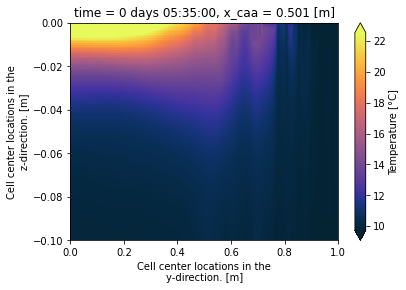

In [10]:
da_dyn.T.isel(x_caa=256, time=-1).plot(robust=True, cmap=cm.cm.thermal)
# da_dyn.T.isel(x_caa=156, time=-1).plot(vmin=11.9, vmax=12.9, cmap=cm.cm.thermal)

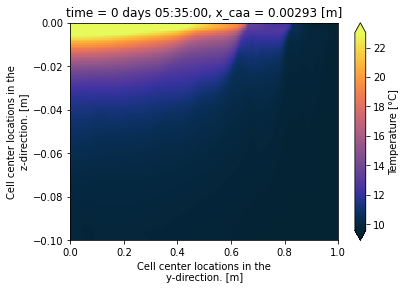

In [11]:
da_dyn.T.isel(x_caa=1, time=-1).plot(robust=True, cmap=cm.cm.thermal)

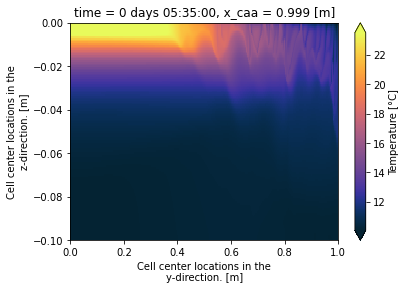

In [12]:
da_dyn.T.isel(x_caa=-1, time=-1).plot(robust=True, cmap=cm.cm.thermal)

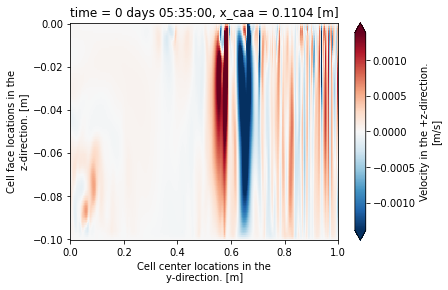

In [13]:
da_dyn.w.isel(x_caa=56, time=-1).plot(robust=True)

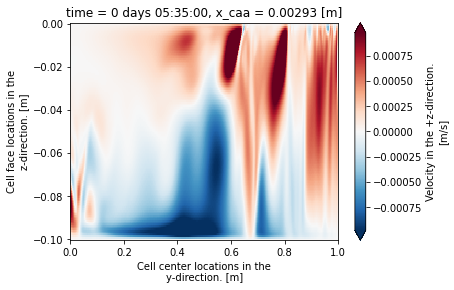

In [14]:
da_dyn.w.isel(x_caa=1, time=-1).plot(robust=True)

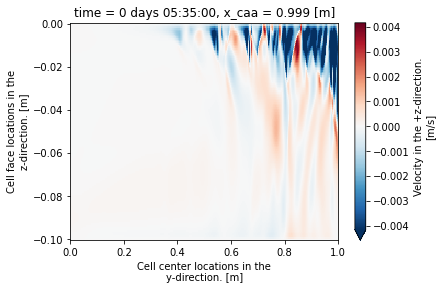

In [15]:
da_dyn.w.isel(x_caa=-1, time=-1).plot(robust=True)

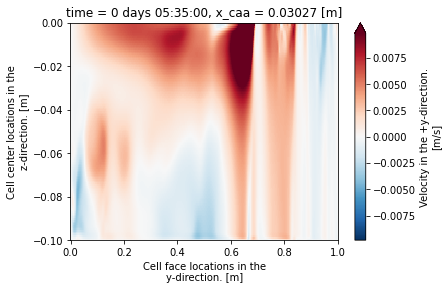

In [16]:
da_dyn.v.isel(x_caa=15, time=-1).plot(robust=True)

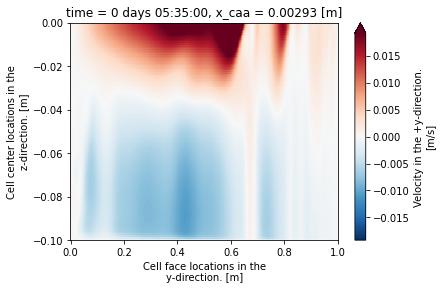

In [17]:
da_dyn.v.isel(x_caa=1, time=-1).plot(robust=True)

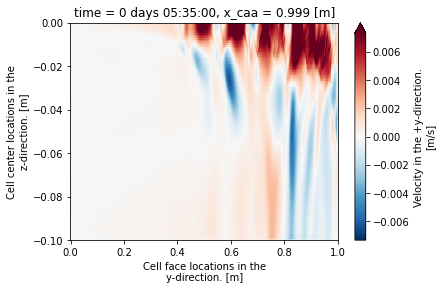

In [18]:
da_dyn.v.isel(x_caa=-1, time=-1).plot(robust=True)

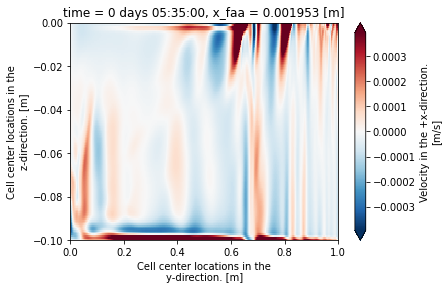

In [19]:
da_dyn.u.isel(x_faa=1, time=-1).plot(robust=True)

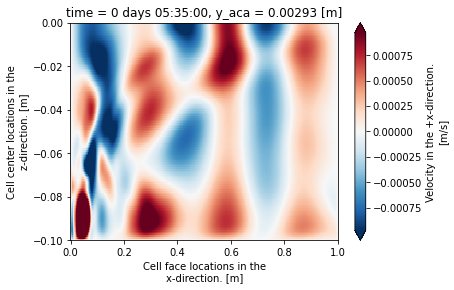

In [20]:
da_dyn.u.isel(y_aca=1, time=-1).plot(robust=True)

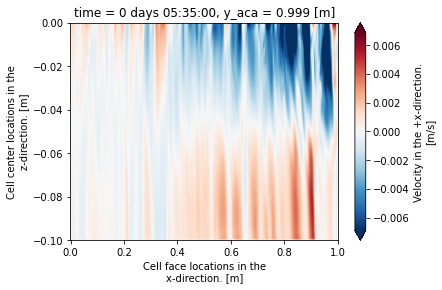

In [21]:
da_dyn.u.isel(y_aca=-1, time=-1).plot(robust=True)

In [34]:
(Ly**2 * np.sqrt(g * α * ΔT * Ly))

0.44721359549995787

In [35]:
(H**2 * np.sqrt(g * α * ΔT * H))

0.0014142135623730952

In [36]:
V = da_dyn.v.sel(time=slice(9000,None)).mean(['x_caa','time']) / (H**2 * np.sqrt(g * α * ΔT * H))
(V.sum('z_aac') - V.cumsum(dim='z_aac')).plot(figsize=(8,2.5), cbar_kwargs={'label':r'$\psi_{yz}$', 'ticks':[-5,0,5]},
                                                   y='z_aac', levels=np.linspace(-7,7,101))#.integrate('y_afa') #
(V.sum('z_aac') - V.cumsum(dim='z_aac')).plot.contour(y='z_aac', levels=[0,1.8,3.5,5.4], colors='k', linewidths=0.5)
plt.xlabel('Y')
plt.ylabel('Z')
# plt.savefig(direc + 'RHC_psi_512x512x256_v1.png', bbox_inches='tight', edgecolor='w', facecolor='w', dpi=300)

TypeError: cannot do slice indexing on TimedeltaIndex with these indexers [9000] of type int

In [37]:
da_dyn.T.sel(time=slice(9000,None), y_aca=slice(0,0.4)).mean(['x_caa','y_aca','time']).plot(y='z_aac')
plt.ylabel('Z')

TypeError: cannot do slice indexing on TimedeltaIndex with these indexers [9000] of type int

## Budgets

In [22]:
da_bud = xr.open_dataset(direc + case + "budgets_v01.nc", decode_times=False)

In [23]:
da_bud

<xarray.Dataset>
Dimensions:  (time: 509, y_afa: 513, x_faa: 513, x_caa: 512, y_aca: 512,
              z_aaf: 129, z_aac: 128)
Coordinates:
  * time     (time) float64 1.411e+04 1.412e+04 ... 2.012e+04 2.013e+04
  * y_afa    (y_afa) float32 0.0 0.001953 0.003906 0.005859 ... 0.9961 0.998 1.0
  * x_faa    (x_faa) float32 0.0 0.001953 0.003906 0.005859 ... 0.9961 0.998 1.0
  * x_caa    (x_caa) float32 0.0009766 0.00293 0.004883 ... 0.9951 0.9971 0.999
  * y_aca    (y_aca) float32 0.0009766 0.00293 0.004883 ... 0.9951 0.9971 0.999
  * z_aaf    (z_aaf) float32 -0.1 -0.09922 -0.09844 ... -0.001563 -0.0007813 0.0
  * z_aac    (z_aac) float32 -0.09961 -0.09883 -0.09805 ... -0.001172 -0.0003906
Data variables:
    Δx_caa   (x_caa) float32 ...
    Δx_faa   (x_faa) float32 ...
    Δy_aca   (y_aca) float32 ...
    Δy_afa   (y_afa) float32 ...
    Δz_aac   (z_aac) float32 ...
    Δz_aaf   (z_aaf) float32 ...
    dissi    (time) float32 ...
    phi_i    (time) float32 ...
    phi_z    (time) float32 ...
Attributes:
    Julia:                      This file was generated using CUDA GPU: NVIDI...
    Oceananigans:               This file was generated using Oceananigans v0...
    date:                       This file was generated on 2025-11-22T11:53:0...
    interval:                   200
    output iteration interval:  Output was saved every 200 iteration(s).
    schedule:                   IterationInterval

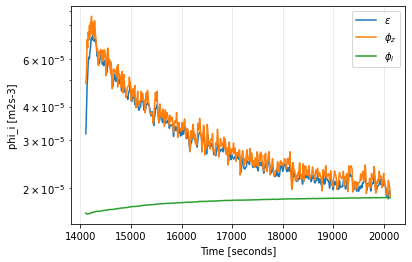

In [24]:
(da_bud.dissi*1020).sel(time=slice(100,None)).plot(label=r'$\epsilon$', yscale='log')
(-da_bud.phi_z).sel(time=slice(100,None)).plot(label=r'$\phi_z$')
(-da_bud.phi_i).sel(time=slice(100,None)).plot(label=r'$\phi_i$')
plt.legend()
plt.grid(alpha=0.3)

In [25]:
Pr = 5
Ra = 1e12
Ro = 0.04

In [26]:
Lx, Ly = 1, 1
H = 0.1
ΔT = 20.0
ν = 1e-6
κ = ν / Pr
α = 2e-4

In [27]:
g_alf = Ra * ν * κ / (ΔT * Ly**2)
g = g_alf / α
print('g = ', g)

g =  49.99999999999999


In [28]:
U = (g * α * ΔT * H)**(1/2)
f0 = U / (Ro * 1)
print('f0 = ', f0)

f0 =  3.5355339059327373


In [41]:
g * α * ΔT

0.19999999999999996

In [43]:
np.sqrt(0.2 * 0.1) / 7

0.06388765649999399

In [44]:
np.sqrt(0.2 * 0.1) / 7

0.020203050891044218

In [45]:
g * α * ΔT / 7

0.028571428571428564

In [24]:
phi_i = - g * κ * Lx * Ly * 2
phi_i

-1.9999999999999995e-05

In [ ]:
# phi_z = g * 

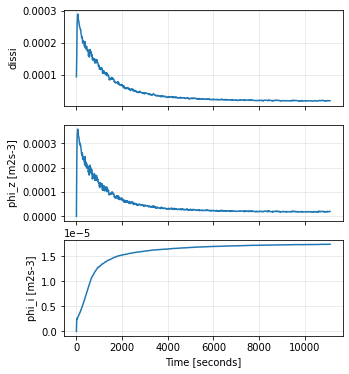

In [5]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(5,6))

# da_bud.dissi.sel(time=slice(1000,None)).plot(ax=ax[0])
(da_bud.dissi*1020).plot(ax=ax[0])
(-da_bud.phi_z).plot(ax=ax[1])
(-da_bud.phi_i).plot(ax=ax[2])

ax[0].set(xlabel='')
ax[1].set(xlabel='')

ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)
ax[2].grid(alpha=0.3)

plt.show()

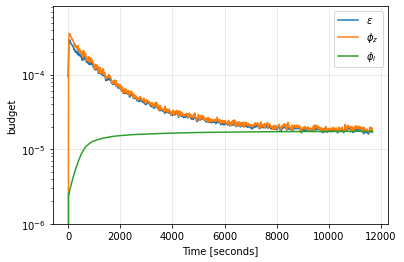

In [7]:
(da_bud.dissi*1020).sel(time=slice(000,None)).plot(label=r'$\epsilon$', yscale='log')
(-da_bud.phi_z).sel(time=slice(000,None)).plot(label=r'$\phi_z$')
(-da_bud.phi_i).sel(time=slice(000,None)).plot(label=r'$\phi_i$')
plt.legend()
plt.ylim([1e-6,None])
plt.ylabel('budget')
plt.grid(alpha=0.3)
# plt.savefig(direc + 'RHC_budgets_512x512x256_v1.png', bbox_inches='tight', edgecolor='w', facecolor='w', dpi=300)

In [ ]:
65536

In [7]:
512*128

65536